In [27]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [ ]:
types = 'crx'

In [39]:
loc = "../local_data/he2_log1"

energies_ng_1 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_1 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_1 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_1 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [40]:
loc = "../local_data/he2_log3"

energies_ng_2 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_2 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_2 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_2 = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [41]:
exact_energy = -5.74032428
thetas = np.linspace(0, 3 * np.pi, 10)


In [46]:
min_ng_1 = np.min(energies_ng_1, axis=1)[:,-1]-exact_energy
min_ng_2 = np.min(energies_ng_2, axis=1)[:,-1]-exact_energy

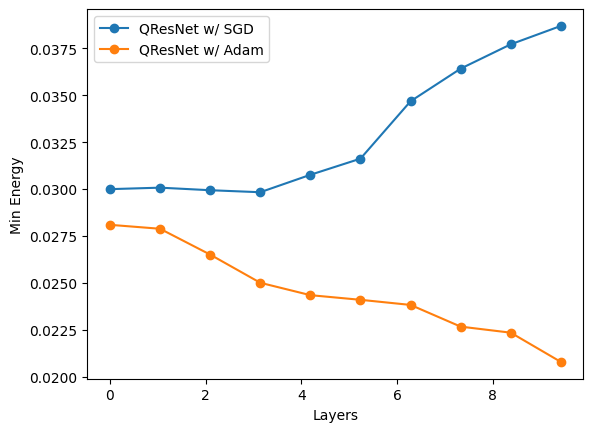

In [47]:
plt.plot(thetas, min_ng_1, marker='o', label='QResNet w/ SGD')
plt.plot(thetas, min_ng_2, marker='o', label='QResNet w/ Adam')
#plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()